In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
df = pd.read_csv('./Weekly_Counts_of_Deaths_by_Jurisdiction_and_Age (1).csv')
df

/var/folders/dc/vmrx_nc16tz65xmfmz0x56kh0000gn/T/ipykernel_37413/3997002089.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Weekly_Counts_of_Deaths_by_Jurisdiction_and_Age (1).csv')


,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Age Group,Number of Deaths,Time Period,Type,Suppress,Note
0,Alabama,01/10/2015,AL,2015,1,25-44 years,67.0,2015-2019,Predicted (weighted),NaN,NaN
1,Alabama,01/17/2015,AL,2015,2,25-44 years,49.0,2015-2019,Predicted (weighted),NaN,NaN
2,Alabama,01/24/2015,AL,2015,3,25-44 years,55.0,2015-2019,Predicted (weighted),NaN,NaN
3,Alabama,01/31/2015,AL,2015,4,25-44 years,59.0,2015-2019,Predicted (weighted),NaN,NaN
4,Alabama,02/07/2015,AL,2015,5,25-44 years,47.0,2015-2019,Predicted (weighted),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
255850,Wyoming,03/18/2023,WY,2023,11,85 years and older,35.0,2023,Unweighted,NaN,Data in recent weeks are incomplete. Only 60% ...
255851,Wyoming,03/25/2023,WY,2023,12,85 years and older,28.0,2023,Unweighted,NaN,Data in recent weeks are incomplete. Only 60% ...
255852,Wyoming,04/01/2023,WY,2023,13,85 years and older,28.0,2023,Unweighted,NaN,Data in recent weeks are incomplete. Only 60% ...
255853,Wyoming,04/08/2023,WY,2023,14,85 years and older,19.0,2023,Unweighted,NaN,Data in recent weeks are incomplete. Only 60% ...


# Question
The question I plan to answer with this data is how did Covid affect the number of deaths for working age and retired age people in the US.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255855 entries, 0 to 255854
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Jurisdiction        255855 non-null  object 
 1   Week Ending Date    255855 non-null  object 
 2   State Abbreviation  255855 non-null  object 
 3   Year                255855 non-null  int64  
 4   Week                255855 non-null  int64  
 5   Age Group           255855 non-null  object 
 6   Number of Deaths    255837 non-null  float64
 7   Time Period         255855 non-null  object 
 8   Type                255855 non-null  object 
 9   Suppress            18 non-null      object 
 10  Note                40529 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 21.5+ MB


In [86]:
ages = df['Age Group'].unique()
ages

array(['25-44 years', '45-64 years', '65-74 years', '75-84 years',
       '85 years and older', 'Under 25 years'], dtype=object)

In [87]:
df['Week Ending Date'] = df['Week Ending Date'].astype('datetime64')
mapping = {'25-44 years': 'Working Class (25-64)', '45-64 years': 'Working Class (25-64)',
           '65-74 years': 'Retired (65+)', '75-84 years': 'Retired (65+)',
           '85 years and older': 'Retired (65+)'}

df['My Age Group'] = df['Age Group'].map(mapping)

In [88]:
time = df[['My Age Group', 'Week Ending Date', 'Number of Deaths', 'Type']]\
    .groupby(by=['My Age Group', 'Week Ending Date']).agg({'Number of Deaths': 'sum'}).sort_index()
time['Prev'] = time['Number of Deaths'].shift()
time['Percent Change'] = time['Number of Deaths'] / time['Prev'] * 100 - 100
time

Number of Deaths      Prev  \
My Age Group          Week Ending Date                               
Retired (65+)         2015-01-10                188656.0       NaN   
                      2015-01-17                186676.0  188656.0   
                      2015-01-24                178776.0  186676.0   
                      2015-01-31                174486.0  178776.0   
                      2015-02-07                173034.0  174486.0   
...                                                  ...       ...   
Working Class (25-64) 2023-03-18                 52802.0   54352.0   
                      2023-03-25                 50224.0   52802.0   
                      2023-04-01                 48631.0   50224.0   
                      2023-04-08                 43464.0   48631.0   
                      2023-04-15                 36543.0   43464.0   

                                        Percent Change  
My Age Group          Week Ending Date                  
Retired (65+)         2015-01-10                   NaN  
                      2015-01-17             -1.049529  
                      2015-01-24             -4.231931  
                      2015-01-31             -2.399651  
                      2015-02-07             -0.832158  
...                                                ...  
Working Class (25-64) 2023-03-18             -2.851781  
                      2023-03-25             -4.882391  
                      2023-04-01             -3.171790  
                      2023-04-08            -10.624910  
                      2023-04-15            -15.923523  

[864 rows x 3 columns]

In [89]:
new_ages = list(time.index.get_level_values(0).unique())
new_ages

['Retired (65+)', 'Working Class (25-64)']

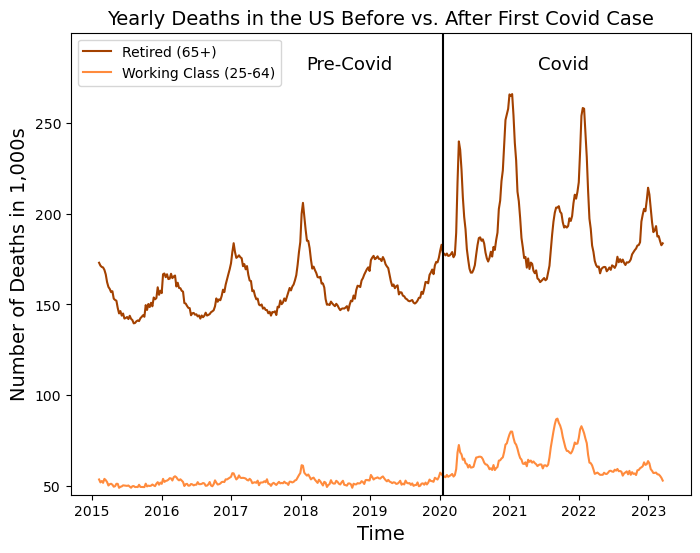

In [90]:
plt.figure(figsize=(8,6))
colors = ['#a34100', '#ff8b3d', '#266DD3']
for i, age in enumerate(new_ages):
    plt.plot(time.loc[age, 'Number of Deaths'][4:-4], label = age, color = colors[i])

start_date = np.datetime64('2020-01-21')
plt.axvline(x=start_date, color='black')
plt.text(17560, 280000, 'Pre-Covid', size = 13, c = 'black')
plt.text(18780, 280000, 'Covid', size = 13, c = 'black')
plt.ylim([45000, 300000])
plt.title('Yearly Deaths in the US Before vs. After First Covid Case', size = 14)
plt.xlabel('Time', size = 14)
plt.ylabel('Number of Deaths in 1,000s', size = 14)
yvals = np.array(range(50000, 251000, 50000))
plt.yticks(yvals, np.int16(yvals/1000))
plt.legend(loc = 'upper left')
plt.show()

Using only this visualization to answer that question, Covid significantly increased the overall and peak number of deaths for both working aged people and retired people.